
# **DATA 311 UBCO, LDA & QDA implemented in Python**

## **Assignment 2, LDA & QDA Classification:**

### **Discriminant Analysis Classification:**

In [20]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

df = pd.read_csv('myopiacomma.csv')
df.head(10)

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1995,0,6,0,1.744,22.14,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,7,1993,0,6,1,0.683,22.33,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,8,1991,0,6,1,1.272,22.39,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,9,1991,0,7,0,1.396,22.62,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,10,1991,0,6,1,0.972,22.74,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [ ]:
df.describe()

In [ ]:
df = df.dropna()

df.describe()

In [21]:
df['PARENTMY'] = (df['MOMMY'] | df['DADMY']).astype(int)

# df.head(10)

df.columns

Index(['ID', 'STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD',
       'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
       'DIOPTERHR', 'MOMMY', 'DADMY', 'PARENTMY'],
      dtype='object')

### **Split the data into a training & testing set as per usual:**

In [22]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.6*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['ID', 'STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD',
       'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
       'DIOPTERHR', 'MOMMY', 'DADMY', 'PARENTMY'],
      dtype='object')

### **Lets do LDA first:**

    which can be implemented with: LDA model = LinearDiscriminantAnalysis().fit(x, y) where X are the input parameters & y is the target output supervising them

In [32]:
x_train_1 = training_data[['SPHEQ', 'AL', 'ACD']]
y_train_1 = training_data['MYOPIC']
x_test_1 =  testing_data[['SPHEQ', 'AL', 'ACD']]
y_test_1 =  testing_data['MYOPIC']

LDAfit_1 = LinearDiscriminantAnalysis().fit(x_train_1, y_train_1)

In [33]:
x_train_2 = training_data[['SPHEQ', 'AL', 'ACD', 'PARENTMY']]
y_train_2 = training_data['MYOPIC']
x_test_2 =  testing_data[['SPHEQ', 'AL', 'ACD', 'PARENTMY']]
y_test_2 =  testing_data['MYOPIC']

LDAfit_2 = LinearDiscriminantAnalysis().fit(x_train_2, y_train_2)

In [34]:
x_train_3 = training_data[['SPHEQ', 'AL', 'ACD', 'PARENTMY', 'READHR', 'COMPHR', 'TVHR']]
y_train_3 = training_data['MYOPIC']
x_test_3 =  testing_data[['SPHEQ', 'AL', 'ACD', 'PARENTMY', 'READHR', 'COMPHR', 'TVHR']]
y_test_3 =  testing_data['MYOPIC']

LDAfit_3 = LinearDiscriminantAnalysis().fit(x_train_3, y_train_3)

### **And QDA second:**

    and for QDA: QDA model = QuadraticDiscriminantAnalysis().fit(x, y) where X are the input parameters & y is the target output supervising them

In [35]:
QDAfit_1 = QuadraticDiscriminantAnalysis().fit(x_train_1, y_train_1)

In [36]:
QDAfit_2 = QuadraticDiscriminantAnalysis().fit(x_train_2, y_train_2)

In [37]:
QDAfit_3 = QuadraticDiscriminantAnalysis().fit(x_train_3, y_train_3)

### **Now its prediction time:**

    which you implement with model.predict(X_test) -- X_test being the parameters the model uses to predict the output

In [38]:
LDAPred_1 = LDAfit_1.predict(x_test_1);         QDAPred_1 = QDAfit_1.predict(x_test_1)

LDAPred_2 = LDAfit_2.predict(x_test_2);         QDAPred_2 = QDAfit_2.predict(x_test_2)

LDAPred_3 = LDAfit_3.predict(x_test_3);         QDAPred_3 = QDAfit_3.predict(x_test_3)

### **And finally, accuracy:**

In [42]:
Accuracy_L1 = (LDAPred_1 == y_test_1).mean();       Accuracy_Q1 = (QDAPred_1 == y_test_1).mean()

Accuracy_L2 = (LDAPred_2 == y_test_2).mean();       Accuracy_Q2 = (QDAPred_2 == y_test_2).mean()

Accuracy_L3 = (LDAPred_3 == y_test_3).mean();       Accuracy_Q3 = (QDAPred_3 == y_test_3).mean()

accuracy = [[Accuracy_L1, Accuracy_Q1], [Accuracy_L2, Accuracy_Q2], [Accuracy_L3, Accuracy_Q3]]

accuracy

[[0.8947368421052632, 0.8785425101214575],
 [0.8947368421052632, 0.9190283400809717],
 [0.8906882591093117, 0.9068825910931174]]

    you can also use accuracy = accuracy_score(y_test, LDAPred) to find the accuracy instead of implementing it from scratch as I did
    just make sure to use /*from sklearn.metrics import accuracy_score*/ to import the function

### **Don't forget to plot what we made:**

Text(0.5, 1.0, 'Accuracy for all the Discriminant analysis models')

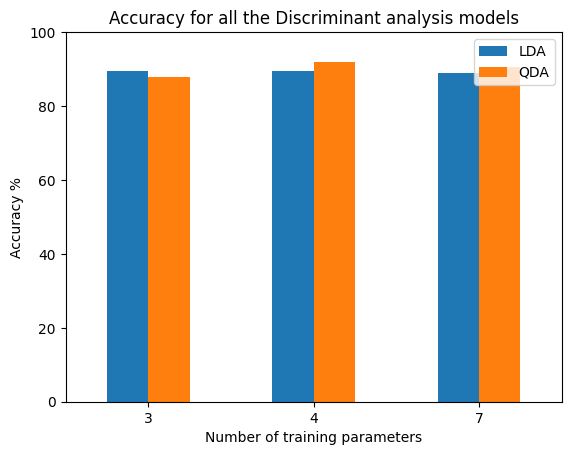

In [62]:
dfOut = pd.DataFrame([[Accuracy_L1*100, Accuracy_Q1*100], [Accuracy_L2*100, Accuracy_Q2*100], [Accuracy_L3*100, Accuracy_Q3*100]], columns=['LDA', 'QDA'])

dfOut.index = ["3", "4", "7"] # type: ignore

dfOut.plot(kind = 'bar', xlabel="Number of training parameters", ylabel="Accuracy %").set_ylim(0, 100)

plt.xticks(rotation=0)

plt.title("Accuracy for all the Discriminant analysis models")

[If you need a refresher on LDA and QDA, I found this video helpful](https://www.youtube.com/watch?v=ScgbJmt-Hng&list=RDMM&index=27)

### **Next Notebooks: logistic regression & trees**